## Question 1

Zero iterations gives a pretty even spread of probabilities across all the possible outcomes.

One iteration gives the correct solution with a probability of 0.8.

Two iterations gives the correct solution almost 95% of the time.

Three iterations gives the correct solution with a probability of only about 0.3.

## Question 2

I would expect the algorithm to return 101 instead of 110 as the correct solution.

This is what happens you run it classically as well as with Grover's algorithm.

## Question 3

In [1]:
def _3sat_mystery_3(qr,qc,reverse=True,full_reverse=False):
    # w,x,y in registers 0,1,2. 
    # Everything else can be temp/results
    # General pattern
    # 1. setup logic (which of a,b,c are negated)
    # 2. execute computation
    # 3. reverse logic so that we are back to a,b,c without negations
    # If this circuit is doing its job, should only be satisfied by 110

    # (a or b or not c)
    setup_or_teardown_logic(qr,qc,True,True,False)
    first_clause=quantumor_3(qr,qc,0,1,2,3,4)
    setup_or_teardown_logic(qr,qc,True,True,False)

    # (a or b or c) 
    setup_or_teardown_logic(qr,qc,True,True,True)
    second_clause=quantumor_3(qr,qc,0,1,2,5,6)
    setup_or_teardown_logic(qr,qc,True,True,True)

    #Store the and in q[7] then reverse q[3], q[4]. q[5] and q[6]
    intermediate_and_pair1 = quantumand_2(qr, qc, first_clause, second_clause, 7)
    #Reverse
    setup_or_teardown_logic(qr,qc,True,True,False)
    quantumor_3_reverse(qr,qc,0,1,2,3,4)
    setup_or_teardown_logic(qr,qc,True,True,False)
    setup_or_teardown_logic(qr,qc,True,True,True)
    quantumor_3_reverse(qr,qc,0,1,2,5,6)
    setup_or_teardown_logic(qr,qc,True,True,True)
    
    # (a or not b or c)
    setup_or_teardown_logic(qr,qc,True,False,True)
    third_clause=quantumor_3(qr,qc,0,1,2,3,4)
    setup_or_teardown_logic(qr,qc,True,False,True)

    # (a or not b or not c)
    setup_or_teardown_logic(qr,qc,True,False,False)
    fourth_clause=quantumor_3(qr,qc,0,1,2,5,6)
    setup_or_teardown_logic(qr,qc,True,False,False)

    #Store the and in q[8] then reverse q[3], q[4]. q[5] and q[6]
    intermediate_and_pair2 = quantumand_2(qr, qc, third_clause, fourth_clause, 8)
    #Reverse
    setup_or_teardown_logic(qr,qc,True,False,True)
    quantumor_3_reverse(qr,qc,0,1,2,3,4)
    setup_or_teardown_logic(qr,qc,True,False,True)
    setup_or_teardown_logic(qr,qc,True,False,False)
    quantumor_3(qr,qc,0,1,2,5,6)
    setup_or_teardown_logic(qr,qc,True,False,False)
    
    
    # (not a or b or not c) 
    setup_or_teardown_logic(qr,qc,False,True,False)
    fifth_clause=quantumor_3(qr,qc,0,1,2,3,4)
    setup_or_teardown_logic(qr,qc,False,True,False)

    # (not a or b or c)
    setup_or_teardown_logic(qr,qc,False,True,True)
    sixth_clause=quantumor_3(qr,qc,0,1,2,5,6)
    setup_or_teardown_logic(qr,qc,False,True,True)
    
    #Store and in q[9]... you get the point
    intermediate_and_pair3=quantumand_2(qr,qc,fifth_clause,sixth_clause,9)
    setup_or_teardown_logic(qr,qc,False,True,False)
    quantumor_3_reverse(qr,qc,0,1,2,3,4)
    setup_or_teardown_logic(qr,qc,False,True,False)
    setup_or_teardown_logic(qr,qc,False,True,True)
    quantumor_3_reverse(qr,qc,0,1,2,5,6)
    setup_or_teardown_logic(qr,qc,False,True,True)

    # (not a or not b or not c) 
    setup_or_teardown_logic(qr,qc,False,False,False)
    seventh_clause=quantumor_3(qr,qc,0,1,2,3,4)
    setup_or_teardown_logic(qr,qc,False,False,False)


    # Let's whittle down
    #intermediate_and_pair1=quantumand_2(qr,qc,first_clause,second_clause,17)
    #intermediate_and_pair2=quantumand_2(qr,qc,third_clause,fourth_clause,18)
    #intermediate_and_pair3=quantumand_2(qr,qc,fifth_clause,sixth_clause,19)

    # Now whittling down further
    intermediate_and_pair_12=quantumand_2(qr,qc,intermediate_and_pair3,seventh_clause,5)
    intermediate_and_pair_34=quantumand_2(qr,qc,intermediate_and_pair1,intermediate_and_pair2,6)

    # Now whittling down to 1 result
    final_result_and_pair_1234=quantumand_2(qr,qc,intermediate_and_pair_12,intermediate_and_pair_34,10)

This code requires 11 qubits though that could be reduced to 10 if I modified the way the qubits are measured at the end and instead stored the result in q[3]. See the GroversAlgorithm notebook for quantumand/quantumor implementations.

## Question 4

In [5]:
def _2sat(a, b):
    return (a or b) and (not a or not b) and (a or not b)
print("11 -> ", _2sat(True, True))
print("10 -> ", _2sat(True, False))
print("01 -> ", _2sat(False, True))
print("00 -> ", _2sat(False, False))

11 ->  False
10 ->  True
01 ->  False
00 ->  False


In [6]:
%matplotlib inline
import qiskit
import time
from qiskit import IBMQ
from qiskit import Aer

# Authenticate an account and add for use during this session. Replace string
# argument with your private token.
IBMQ.load_accounts()

In [8]:
import matplotlib
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from  qiskit.tools.visualization  import circuit_drawer
from qiskit.extensions.standard import ccx

def quantumand_2(qr,qc,w,x,t1):
    qc.ccx(qr[w],qr[x],qr[t1])
    return t1

def quantumand_3(qr,qc,w,x,y,t1,t2):
    qc.ccx(qr[w],qr[x],qr[t1])
    qc.ccx(qr[y],qr[t1],qr[t2])
    return t2

def quantumor_2(qr,qc,w,x,t1):
    qc.x(qr[w])
    qc.x(qr[x])
    qc.x(qr[t1])
    qc.ccx(qr[w],qr[x],qr[t1])
    qc.x(qr[w])
    qc.x(qr[x])
    return t1

def quantumor_2_reverse(qr,qc,w,x,t1):
    qc.x(qr[x])
    qc.x(qr[w])
    qc.ccx(qr[w],qr[x],qr[t1])
    qc.x(qr[t1])
    qc.x(qr[x])
    qc.x(qr[w])
    return t1

def setup_or_teardown_logic(qr,qc,is_a,is_b): 
    """    
    is_a,is_b,and is_c: False indicates the variable should be negated, True left as is.
    Negation is done with the X gate.

    """    
    if not is_a:
        qc.x(qr[0])
    if not is_b:
        qc.x(qr[1])

In [9]:
def _2sat_mystery(qr, qc):
    
    setup_or_teardown_logic(qr, qc, True, True)
    first_clause = quantumor_2(qr, qc, 0, 1, 2)
    setup_or_teardown_logic(qr, qc, True, True)
    
    setup_or_teardown_logic(qr, qc, False, False)
    second_clause = quantumor_2(qr, qc, 0, 1, 3)
    setup_or_teardown_logic(qr, qc, False, False)
    
    setup_or_teardown_logic(qr, qc, True, False)
    third_clause = quantumor_2(qr, qc, 0, 1, 4)
    setup_or_teardown_logic(qr, qc, True, False)
    
    final_result = quantumand_3(qr, qc, first_clause, second_clause, third_clause, 5, 6)

In [10]:
import time
from qiskit.tools.visualization import plot_histogram
def try_input_combination(input_combination,shots=1):
    
    backend = IBMQ.get_backend('ibmq_qasm_simulator') # remote simulator
    qr = QuantumRegister(7)
    cr = ClassicalRegister(7)
    qc = QuantumCircuit(qr,cr)
    # setting up the input
    for i in range(2):
        if input_combination[i]:
            qc.x(qr[i])
    # calling the function on that input
    _2sat_mystery(qr,qc)
    # measuring every qubit as we will want to verify reversibility 
    for i in range(7):
        qc.measure(qr[i],cr[i])

    # Executing the job on IBM QX
    job_exp = qiskit.execute(qc, backend=backend,shots=shots)
    result = job_exp.result()
    final=result.get_counts(qc)
    if not len(final)==1:
        print(input_combination,final)
    else:
        # note that due to IBM's choice the result returned is in opposite order with last register coming first 
        # and the first register coming last. For clarity we reverse the output so the first register is first
        # and the last register is last.

        result_in_order=list(final.keys())[0][::-1]
        print(input_combination,'->',result_in_order[-1],'(measured bits: '+result_in_order+')')

In [11]:
import itertools
for combo in itertools.product([0,1],repeat=2):
    try_input_combination(combo)

(0, 0) -> 0 (measured bits: 0001100)
(0, 1) -> 0 (measured bits: 0111010)
(1, 0) -> 1 (measured bits: 1011111)
(1, 1) -> 0 (measured bits: 1110100)


In [12]:
def grovers_algorithm(checker,num_inputs,num_registers,num_iterations=None):
    if num_iterations == None:
        from math import floor,sqrt
        iterations=floor(sqrt(2**num_inputs))
    else:
        iterations=num_iterations
    print("Running Grover's algorithm for %d iterations"%iterations)
    qr = QuantumRegister(num_registers)
    cr = ClassicalRegister(num_registers)
    qc = QuantumCircuit(qr,cr)
    # Configuring the input
    for i in range(num_inputs):
        qc.h(qr[i])
    # Setting up the output of the checker function
    qc.x(qr[num_registers-1])
    qc.h(qr[num_registers-1])
    
    # Do the Grovers steps
    for it in range(iterations):
        checker(qr,qc)
        mover(qr,qc,num_inputs)
    # Measure the inputs
    for j in range(num_inputs):
        qc.measure(qr[j], cr[j])
    return cr,qr,qc

    
def control_Z(qr,qc,num_inputs):
    if num_inputs not in [2,3]:
        raise Exception("currently only supports 2 or 3 inputs")
    if num_inputs==2:
        qc.h(qr[1])
        qc.cx(qr[0],qr[1])
        qc.h(qr[1])
    elif num_inputs==3:
        qc.h(qr[2])
        qc.ccx(qr[0],qr[1],qr[2])    
        qc.h(qr[2])
    
def mover(qr,qc,num_inputs):
    if num_inputs not in [2,3]:
        raise Exception("currently only supports 2 or 3 inputs")
    for i in range(num_inputs):
        qc.h(qr[i])
    for i in range(num_inputs): # D matrix
        qc.x(qr[i]) 
    control_Z(qr,qc,num_inputs)
    for i in range(num_inputs):
        qc.x(qr[i])
    for i in range(num_inputs):
        qc.h(qr[i])

In [13]:
def run_2sat_mystery_grover_ibm_sim(num_iterations=None,backend=None):
    if not backend:
        backend=IBMQ.get_backend('ibmq_qasm_simulator')
    import time
    from qiskit.tools.visualization import plot_histogram
    shots=50
    cr,qr,qc = grovers_algorithm(_2sat_mystery,2,7,num_iterations=num_iterations)
    job_exp = qiskit.execute(qc, backend=backend,shots=shots)
    result = job_exp.result()
    final=result.get_counts(qc)
    print(final)
    return final

Running Grover's algorithm for 2 iterations
{'0000010': 20, '0000000': 7, '0000001': 17, '0000011': 6}


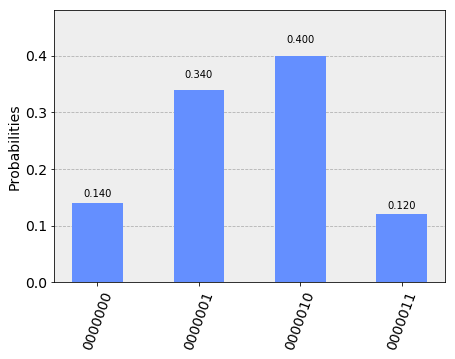

In [18]:
final=run_2sat_mystery_grover_ibm_sim()
plot_histogram(final)